# SWMAL Exercise


## Convolutional Neural Networks (CNNs)


Excercise 9 from [HOML], p.496 2nd./p.535 3rd. (slighty modified):

__"9. Build an CNN via the Keras API and try to achieve the highest possible accuracy on MNIST."__

For the journal: 

* write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..), 
* document your experiments towards the end-goal of reaching 'a high accuracy' (what did you try, what work/did not work), 
* document how you use '_generalization_' in your setup (us of simple hold-out/train-test split or k-fold, or etc..),
* produce some sort of '_learning-curve_' that illustrates the drop in cost- or increase in score-function with respect to, say training iteration (for inspiration see fig 4.20, 10-12 or 10.17 in [HOML]),
* document the final CNN setup (layers etc., perhaps as a graph/drawing), 
* discus on your iterations towards the end-goal and other findings you had,
* and, as always, write a conclusion.

If you use a code template from slides, HOML or the internet, then remember to add a reference to the original work in you journal.

Write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..):

A convolutional nerual network (CNN) is a specific type of neural network (NN), 
designed for processing data like images. Whereas NN can be "general-purpose",
the CNN is more focused on analzying grid-like data, which is what images are.
Therefore the CNN would be prefered to use in cases like image classification,
where you would label items in the image, and object detection in the image.

Convolutional layer:
A CNN consists of multiple layers where the convolutional layer is the building block of the CNN,
and this layer is also where the neural network has its name from. 
This layer aplies different filters to the input data. Each of these filters can be described as a small matrix filled with weights,
that moves across the data (like moving across a image) doing calculations at each of its positions, this operation is called convolution.
The goal of these filters is to find features or patterns within the image. 
Examples of this can be edges of motives in the image, and later more complex things in the image, like shapes and recognizable parts of objects.

Pooling layer:
The pooling layers goal is to reduce the input data into small parts, therefor with images a small part will be a small group of pixels.
The two most common technic of doing this is Max pooling or average pooling.
The max pooling takes maximum values of the small part of the input data, 
where the average pooling takes the average value from the small part of the input data.

Fully Connected layer:
Lastly there is the fully connected layer, which combines the several layers of convolutional and pooling layers. 
Here the classification task is performed. 


---- FØLGENDE ER KOPIRET FRA GEMINI ---- 
Ved ikke om det er relevant...

How CNNs Learn

Feature Extraction: 
Convolutional and pooling layers work together to extract a hierarchy of features from the input image,
going from simple to complex.

Classification: 
Fully connected layers analyze these high-level features,
ultimately predicting the class of the input image or the locations of objects within it.

Backpropagation: 
Like other neural networks, CNNs learn through a process called backpropagation. 
This involves calculating the error between the predicted output and the correct label, 
and then adjusting the weights within the filters and all layers backwards through the network to minimize that error.
----------------------------------------------------------GEMINI^^^^

Our code is structured as a class, where there are 3 different methods. `createModel()` is the method responsible for creating a CNN model with the Keras API, `train_and_test_model()` method will train and test the model with the mnit-dataset. We've decided to use the built-in feature, where the dataset is already split up and the test-data is only being tested on. `plotTrainingData` plots the mean of loss and accuracy of each epoch, this way we can see, how the amount of epochs affect the accuracy and loss of the model. 

We've primarily been testing with the amount of epochs and how it affect the accuracy and loss of our model. The number of layers and amount of neurons hasn't been manipulated, because we want to keep these factors stabile.

What we've seen is that when the amount of epochs exceed 5-10 the model will still get better, both loss and accuracy, but the amount is descending and it doesn't get better at a rate, where it'll be worth it to keep expanding the amount of epochs. 



313/313 [==============================] - 2s 3ms/step - loss: 0.0413 - accuracy: 0.9887
Test mean accuracy 0.9886999726295471
Test mean loss 0.04126809164881706


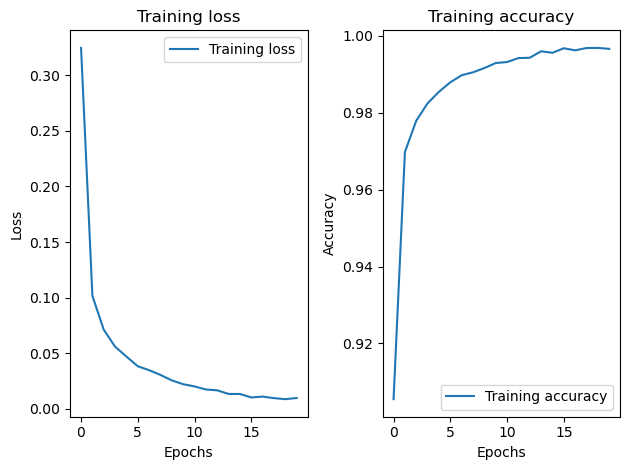

In [48]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.datasets import mnist

class CNNModel(keras.callbacks.Callback):
    def __init__(self) -> None:
        # Gemini code
        (self.x_train, self.y_train), (self.x_test, self.y_test) = mnist.load_data()
        
        self.epoch_loss = None
        self.epoch_accuracy = None
        self.training_loss = None
        self.training_accuracy = None
        
    # Function is implemented using lesson07 slides
    def createModel(self):
        model = keras.Sequential()
        model.add(layers.Conv2D(filters = 6, kernel_size=(3,3), activation='relu', input_shape= (28,28,1)))
        model.add(layers.AveragePooling2D())
        model.add(layers.Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
        model.add(layers.AveragePooling2D())
        model.add(layers.Flatten())
        model.add(layers.Dense(units = 120, activation='relu'))
        model.add(layers.Dense(units = 84, activation='relu'))
        model.add(layers.Dense(units = 10, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        return model
    
    def train_and_test_model(self):
        cnn_model = self.createModel()
        self.epoch_loss = []
        self.epoch_accuracy = []
        self.training_loss = []
        self.training_accuracy = []

        # Gemini code - Necessary in order to reshape data match the expected format for CNN
        self.x_train = self.x_train.reshape((-1,28,28,1)).astype('float32') / 255.0
        self.x_test = self.x_test.reshape((-1,28,28,1)).astype('float32') / 255.0

        # Gemini code - Label encoding, fixes problem between model output and our own labels
        self.y_train = keras.utils.to_categorical(self.y_train, num_classes=10)
        self.y_test = keras.utils.to_categorical(self.y_test, num_classes=10)
        
        # Gemini code
        for epoch in range(1, 21):
            modelHistory = cnn_model.fit(self.x_train, self.y_train, epochs=1, batch_size=64, verbose=1)
        
            self.epoch_loss.append(modelHistory.history['loss'][0])
            self.epoch_accuracy.append(modelHistory.history['accuracy'][0])
                
                
        self.training_loss.append(self.epoch_loss)
        self.training_accuracy.append(self.epoch_accuracy)
        
        test_loss, test_acc = cnn_model.evaluate(self.x_test, self.y_test)
        print("Test mean accuracy", np.mean(test_acc))
        print("Test mean loss", np.mean(test_loss))
        
    # Code-structure from stack overflow
    def plotTrainingData(self):
        plt.subplot(1,2,1)
        plt.plot(np.mean(self.training_loss, axis=0), label="Training loss")
        plt.title("Training loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        
        plt.subplot(1,2,2)
        plt.plot(np.mean(self.training_accuracy, axis=0), label="Training accuracy")
        plt.title("Training accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        
newCnn = CNNModel()

newCnn.train_and_test_model()
newCnn.plotTrainingData()


### Conclusion
We've worked with a CNN model and trained to process images. We've been running the the training data for 20 epochs and based on this training we've tested on a test-dataset where the accuracy became 0.9887 and the loss became 0.0413. These values are exceptionally low, so based on the MNIST dataset the model is exremely accurate.

REVISIONS||
:- | :- |
2021-10-20| CEF, initial version, clone from [HOML].
2021-10-26| CEF, added learning curve item.
2022-01-25| CEF, update to SWMAL F22.
2023-03-08| CEF, updated page no to HOML 3rd. ed., updated to SWMAL F23.
2023-03-15| CEF, removed wording "from scratch", replaced with "via the Keras API" and added comment about references.